<a href="https://colab.research.google.com/github/Nico-GP/Coding-Dojo_Track2/blob/main/Week7/Bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CODING DOJO**: Bank Modified
## Creado por: Nicolas Gonzalez
### Descripcion: Analisis de exito de campaña publicitaria
* Creado: 15/02/22
* Ultima Actualizacion: 15/02/22

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
bm = pd.read_csv('/content/drive/My Drive/CodingDojo/Week7/bank_modified.csv')
bm.head()

,age,balance,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,y_yes
0,30,1787,79,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
1,33,4789,220,1,339,4,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0
2,35,1350,185,1,330,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
3,30,1476,199,4,-1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0
4,59,0,226,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0


In [3]:
bm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  4521 non-null   int64
 1   balance              4521 non-null   int64
 2   duration             4521 non-null   int64
 3   campaign             4521 non-null   int64
 4   pdays                4521 non-null   int64
 5   previous             4521 non-null   int64
 6   job_blue-collar      4521 non-null   int64
 7   job_entrepreneur     4521 non-null   int64
 8   job_housemaid        4521 non-null   int64
 9   job_management       4521 non-null   int64
 10  job_retired          4521 non-null   int64
 11  job_self-employed    4521 non-null   int64
 12  job_services         4521 non-null   int64
 13  job_student          4521 non-null   int64
 14  job_technician       4521 non-null   int64
 15  job_unemployed       4521 non-null   int64
 16  job_unknown          452

In [4]:
bm.isnull().sum()

age                    0
balance                0
duration               0
campaign               0
pdays                  0
previous               0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_married        0
marital_single         0
education_secondary    0
education_tertiary     0
education_unknown      0
default_yes            0
housing_yes            0
loan_yes               0
y_yes                  0
dtype: int64

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix

# Regresion Logistica

Se crea matriz de caracteristicas y vector objetivo

In [8]:
X = bm.drop(columns = 'y_yes')
y = bm['y_yes']

Se divide en datos de entrenamiento y testeo

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 3, stratify = y)

Se ajustan los datos de entrenamiento

In [10]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Se crea diccionario de parametros por experimentar

In [12]:
parametros = {'penalty' : ['l1', 'l2'],
              'C' : [0.0001, 0.001, 0.01, 0.1, 1, 10],
              'class_weight' : [None, 'balanced|']}

Se llama a regresion logistica

In [14]:
log_reg = LogisticRegression(solver = 'liblinear')

Se analisa la mejor combinacion de parametros

In [17]:
gs = GridSearchCV(log_reg, parametros, cv = 5)
gs.fit(X_train, y_train)
gs.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1541, in fit
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 1150, in _fit_liblinear
    class_weight_ = compute_class_weight(class_weight, classes=classes_, y=y)
  File

{'C': 10, 'class_weight': None, 'penalty': 'l1'}

## Metricas

Coeficiente de determinacion de entrenamiento

In [18]:
gs.score(X_train, y_train)

0.8896755162241888

Coeficicente de determinacion de testeo

In [19]:
gs.score(X_test, y_test)

0.8912466843501327

Se almacen las predicciones

In [21]:
prediccion = gs.predict(X_test)

Matriz de condusion

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


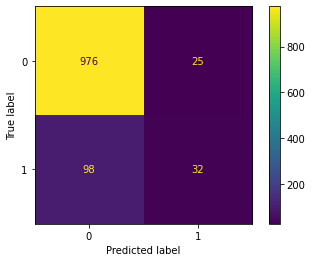

In [24]:
plot_confusion_matrix(gs, X_test, y_test);

Se guardan los datos de matriz como variables

In [26]:
tn, fp, fn, tp = confusion_matrix(y_test, prediccion).ravel()

Calculo de sensitividad

In [31]:
sensitividad = tp / (tp + fn)
print(sensitividad)

0.24615384615384617


Calculo de especificidad

In [32]:
especificidad = tn / (tn + fp)
print(especificidad)

0.975024975024975


Coeficiente roc

In [33]:
roc_auc_score(y_test, gs.predict_proba(X_test)[:,1])

0.8537155152539768

Curva roc

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


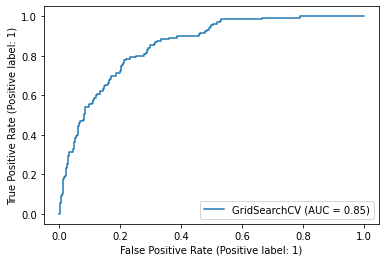

In [34]:
plot_roc_curve(gs, X_test, y_test);

# Preguntas

¿Qué métrica será la mejor para evaluar tu modelo de clasificación para este conjunto de datos y por qué?

> Especificida y sensitividad son metricas importantes para esta campaña. Sobre todo sensitividad, ya que esta calcula los verdaderos positivos, lo cual es el proposito de la campaña

 ¿Qué métrica va a ayudar más al banco?
Compara la precisión de tu modelo con el modelo de referencia. ¿Ves algún problema aquí?

In [35]:
y_test.value_counts(normalize = True)

0    0.885057
1    0.114943
Name: y_yes, dtype: float64

> La precision del modelo de regresion logistica es de 89,1%, lo cual no es una gran mejora frente al modelo base de 88,5%

¿De qué otras formas podrías mejorar este modelo?

> Usando herramientas y tecnicas para compensar el desbalance de la base de datos en el vector objetivo